In [49]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [50]:
def load_Datasets():
    train_dataset = h5py.File('/home/akhilesh/Desktop/IIT GUWAHATI SEM2/Github/NN/NN/train_catvnoncat.h5',"r")
    train_x = np.array(train_dataset["train_set_x"][:])
    train_y = np.array(train_dataset["train_set_y"][:])
    
    test_dataset = h5py.File('/home/akhilesh/Desktop/IIT GUWAHATI SEM2/Github/NN/NN/test_catvnoncat.h5',"r")
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])
    
    classes = np.array(test_dataset['list_classes'][:])
    train_y = train_y.reshape(1,train_y.shape[0])
    test_y = test_y.reshape(1,test_y.shape[0])
    
    return train_x,train_y,test_x,test_y,classes

In [51]:
train_x,train_y,test_x,test_y,classes = load_Datasets()
print("Train X shape :" + str(train_x.shape))
print("Test_X.shape :" + str(test_x.shape))
print("Train_Y.shape :" + str(train_y.shape))
print("Test_Y.shape : " + str(test_y.shape))

Train X shape :(209, 64, 64, 3)
Test_X.shape :(50, 64, 64, 3)
Train_Y.shape :(1, 209)
Test_Y.shape : (1, 50)


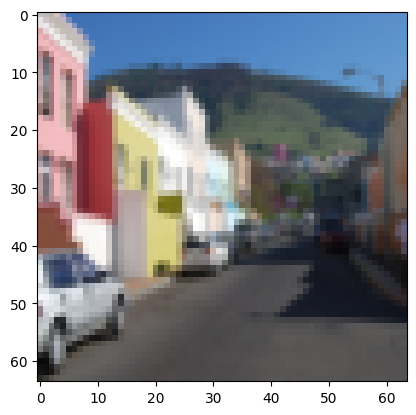

In [52]:
plt.imshow(train_x[1])

In [53]:
train_x = train_x.reshape(train_x.shape[0],-1).T
test_x = test_x.reshape(test_x.shape[0],-1).T

print("Train_X shape:" + str(train_x.shape))
print("Train_Y shape:" + str(train_y.shape))

print("Test_X shape" + str(test_x.shape))
print("Test_Y shape" + str(test_y.shape))

Train_X shape:(12288, 209)
Train_Y shape:(1, 209)
Test_X shape(12288, 50)
Test_Y shape(1, 50)


In [54]:
train_x = train_x/255
test_x = test_x/255

In [62]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [63]:
def initialize_parameters(dim):
    w = np.random.randn(dim,1)*0.01
    b= 0
    return w,b

In [64]:
def propagate(w,b,X,Y):
    m = X.shape[1]
    
    #calculate activation function
    A = sigmoid(np.dot(w.T,X)+b)
    
    #find the cost
    cost = (-1/m)*np.sum(Y * np.log(A) + (1-Y)*np.log(1-A))
    
    #find gradient (back propagation)
    dw = (1/m) * np.dot(X,(A-Y).T)
    db = (1/m) * np.sum(A - Y)
    
    cost = np.squeeze(cost)
    grads = {"dw" : dw ,"db" : db}
    return grads,cost

In [80]:
def gradient_descent(w,b,X,Y,iterations,learning_rate):
    costs = []
    for i in range(iterations):
        grads,cost = propagate(w,b,X,Y)
        
        #update parameters
        w = w - (learning_rate * grads["dw"])
        b = b - (learning_rate) * grads["db"]
        costs.append(cost)
        if(i%500 == 0):
            print("Cost after iteration :" ,i, " : ", cost)
        params = {"w":w, "b":b}
    return params,costs

In [81]:
def predict(w,b,X):
    m = X.shape[1]
    y_pred = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    A = sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        y_pred[0,i] = 1 if A[0,i] > 0.5 else 0
        pass
    return y_pred

In [82]:
def model(train_x,train_y,test_x,test_y,iterations,learning_rate):
    w,b = initialize_parameters(train_x.shape[0])
    parameters,costs = gradient_descent(w,b,train_x,train_y,iterations,learning_rate)
    w = parameters["w"]
    b = parameters["b"]
    
    train_pred_y = predict(w,b,train_x)
    test_pred_y = predict(w,b,test_x)
    
    print("Training accuracy : {}%".format(100 - np.mean(np.abs(train_pred_y - train_y))))
    print("Testing accuracy : {}%".format(100 - np.mean(np.abs(test_pred_y - test_y))))
    
    return costs
    

In [83]:
costs = model(train_x,train_y,test_x,test_y,iterations = 2000,learning_rate=0.005)

Cost after iteration : 0  :  1.0884690957408831
Cost after iteration : 500  :  0.3042641128112232
Cost after iteration : 1000  :  0.21504417611578117
Cost after iteration : 1500  :  0.1665600849434549
Training accuracy : 99.99043062200957%
Testing accuracy : 99.7%


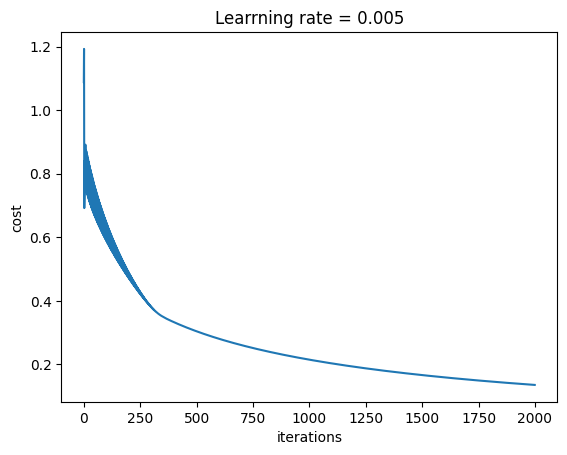

In [84]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title('Learrning rate = 0.005')
plt.show()